In [1]:
import pandas as pd
import numpy as np
import csv

from astropy.io import fits
import os

from sklearn.model_selection import train_test_split

# 分数据集

## 低信噪比  data1

In [239]:
filepath1 = r'./最值归一化/LowSNR_standardised.csv'
 
import pandas as pd

# 以 DataFrame 格式读取 csv
data1 = pd.read_csv(open(filepath1, encoding='utf8'))   # lamost 的csv文件不是用逗号做分隔符，是用‘|’号，记得 sep='|'
data1


,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,0.850368,0.935842,0.901944,0.758823,0.814006,0.868331,0.815123,0.927429,0.906765,0.812477,...,0.080141,0.068517,0.056937,0.066003,0.070984,0.062535,0.065083,0.064720,0.060648,0.073684
1,0.839321,0.796829,0.818777,0.561720,0.756320,0.806635,0.788830,0.785441,0.849652,0.686358,...,0.120949,0.119083,0.113205,0.115658,0.109283,0.104105,0.101395,0.099948,0.109138,0.121747
2,0.826849,0.890172,0.903073,0.736522,0.820851,0.820710,0.834890,0.858841,0.866096,0.766474,...,0.039790,0.033948,0.037932,0.037651,0.036931,0.025399,0.023170,0.029010,0.033066,0.040551
3,0.868535,0.916642,0.931314,0.789410,0.807288,0.939511,0.941725,0.914830,0.971830,0.858890,...,0.037130,0.040472,0.050677,0.041067,0.035892,0.033042,0.025036,0.029259,0.040035,0.042986
4,0.879783,1.000000,0.814820,0.860338,0.897784,0.923790,0.956820,0.923029,0.950096,0.893225,...,0.064714,0.065776,0.063918,0.050803,0.021642,0.002204,0.000000,0.020786,0.054840,0.066435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,0.850684,0.931700,0.874142,0.786077,0.845500,0.876845,0.855909,0.912456,0.912827,0.893115,...,0.101769,0.092509,0.084080,0.074551,0.035516,0.000000,0.001626,0.030088,0.074407,0.099730
720,0.724984,0.712255,0.665950,0.509801,0.720274,0.703530,0.731835,0.734893,0.784968,0.716008,...,0.123271,0.108898,0.131128,0.129663,0.082041,0.031575,0.018435,0.037129,0.082520,0.129129
721,0.717496,0.740217,0.673678,0.651093,0.583619,0.637256,0.721706,0.738735,0.740009,0.749135,...,0.112020,0.104910,0.119115,0.108679,0.059195,0.015102,0.002762,0.042073,0.101152,0.127038
722,0.866856,0.858291,0.850918,0.711756,0.829150,0.925890,0.875313,0.937702,0.810531,0.822587,...,0.095250,0.078414,0.089816,0.099810,0.035880,0.000000,0.028469,0.069587,0.087426,0.086938


## 高信噪比  data2

In [240]:
filepath2 = r'./最值归一化/HighSNR_standardised.csv'
 
import pandas as pd

# 以 DataFrame 格式读取 csv
data2 = pd.read_csv(open(filepath2, encoding='utf8'))   # lamost 的csv文件不是用逗号做分隔符，是用‘|’号，记得 sep='|'
data2

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,0.858184,0.933408,0.905680,0.770998,0.817405,0.887274,0.897953,0.913008,0.927520,0.876678,...,0.068797,0.067255,0.067556,0.065367,0.054303,0.052111,0.052874,0.055687,0.067683,0.074150
1,0.896829,0.898988,0.902678,0.658571,0.842402,0.897597,0.885509,0.884965,0.904074,0.837285,...,0.070311,0.068567,0.069688,0.073058,0.065942,0.058229,0.054987,0.056474,0.064517,0.070629
2,0.843488,0.911951,0.900572,0.799921,0.863023,0.884152,0.900805,0.871523,0.894180,0.824287,...,0.082824,0.086171,0.084293,0.085074,0.079330,0.066571,0.060794,0.067225,0.079211,0.082329
3,0.464443,0.490243,0.501556,0.422210,0.430320,0.483452,0.488569,0.492373,0.512453,0.478474,...,0.037955,0.037694,0.038559,0.037232,0.032917,0.024157,0.020046,0.023440,0.031819,0.036252
4,0.927447,0.940729,0.861954,0.800967,0.912605,0.928122,0.933809,0.911799,0.940239,0.906268,...,0.073440,0.066251,0.071883,0.063634,0.029447,0.002965,0.000000,0.025998,0.064017,0.079733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,0.904662,0.930533,0.891031,0.842232,0.866783,0.939627,0.919704,0.947512,0.911447,0.912783,...,0.119555,0.115295,0.107426,0.098608,0.055862,0.008084,0.000000,0.037596,0.091831,0.120380
720,0.678262,0.704544,0.671352,0.501047,0.648561,0.683181,0.707496,0.722438,0.742754,0.697031,...,0.215842,0.210158,0.212412,0.203688,0.124372,0.027224,0.000000,0.062406,0.171009,0.236916
721,0.707127,0.736286,0.735812,0.593116,0.641696,0.686442,0.729489,0.742314,0.737168,0.716358,...,0.174188,0.156129,0.165694,0.163039,0.087122,0.015361,0.001637,0.055977,0.142346,0.192337
722,0.837527,0.861072,0.837775,0.765691,0.820877,0.916115,0.877490,0.931312,0.858913,0.830687,...,0.120166,0.114344,0.113577,0.114075,0.058828,0.002471,0.001578,0.047212,0.105948,0.139016


## train low

In [260]:
X_train_Low = data1[:582]
X_train_Low.shape

(582, 2500)

In [261]:
X_test_Low = data1[582:]
X_test_Low.shape

(142, 2500)

##  train high

In [263]:
X_train_High = data2[:582]
X_train_High.shape

(582, 2500)

In [262]:
X_test_High = data2[582:]
X_test_High.shape

(142, 2500)

In [265]:
X_test_High

array([[0.74752126, 0.80636257, 0.79322045, ..., 0.06953516, 0.08619394,
        0.09998143],
       [0.89975493, 0.94261621, 0.91894123, ..., 0.0135211 , 0.01958508,
        0.02266258],
       [0.61328742, 0.65307748, 0.67803423, ..., 0.1045195 , 0.13470211,
        0.15274261],
       ...,
       [0.70712661, 0.73628595, 0.73581205, ..., 0.05597691, 0.14234577,
        0.19233654],
       [0.83752703, 0.86107193, 0.83777504, ..., 0.04721235, 0.10594807,
        0.13901634],
       [0.75436322, 0.79375752, 0.83071705, ..., 0.07289035, 0.18699869,
        0.25661393]])

## 训练数据 reshape

In [267]:
X_train_High = X_train_High.reshape((-1,2500)).astype("float32")

In [268]:
X_train_High.shape

(582, 2500)

In [269]:
X_train_Low = X_train_Low.reshape((-1,2500)).astype("float32")

In [270]:
X_train_Low.shape

(582, 2500)

## 测试数据 reshape

In [271]:
X_test_High = X_test_High.reshape((-1,2500)).astype("float32")

In [272]:
X_test_High.shape

(142, 2500)

In [273]:
X_test_Low = X_test_Low.reshape((-1,2500)).astype("float32")

In [274]:
X_test_Low.shape

(142, 2500)

# cycleGAN

In [288]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage.interpolation

import pickle
import io
import os
import time
from IPython.display import clear_output

In [289]:

#训练参数
learning_rate = 0.002
BATCH_SIZE =2
epochs = 50000

#网络参数
image_dimension = 2500  # 图像尺寸

# 判别器节点
H_dim = 128  # D_hidden_layer.shape: 

In [290]:
def xavier_init(shape):
  return tf.random_normal(shape = shape, stddev = 1./tf.sqrt(shape[0]/2.0))

In [291]:
import tensorflow.compat.v1 as tf

tf.disable_v2_behavior() 

# 定义占位符
X_A = tf.placeholder(tf.float32, shape = [None, image_dimension])
X_B = tf.placeholder(tf.float32, shape = [None, image_dimension])

In [292]:
#定义判别器 A 的权重和偏差字典

Disc_A_W = {"disc_H": tf.Variable(xavier_init([image_dimension, H_dim])),
            "disc_final": tf.Variable(xavier_init([H_dim, 1]))}

Disc_A_Bias = {"disc_H": tf.Variable(xavier_init([H_dim])),
            "disc_final": tf.Variable(xavier_init([1]))}

# 义判别器 B的权重和偏差字典

Disc_B_W = {"disc_H": tf.Variable(xavier_init([image_dimension, H_dim])),
            "disc_final": tf.Variable(xavier_init([H_dim, 1]))}

Disc_B_Bias = {"disc_H": tf.Variable(xavier_init([H_dim])),
            "disc_final": tf.Variable(xavier_init([1]))}

# 为生成器将 A 转换为 B 定义权重和偏差字典

Gen_AB_W = {"Gen_H": tf.Variable(xavier_init([image_dimension, H_dim])),
            "Gen_final": tf.Variable(xavier_init([H_dim, image_dimension]))}

Gen_AB_Bias = {"Gen_H": tf.Variable(xavier_init([H_dim])),
            "Gen_final": tf.Variable(xavier_init([image_dimension]))}

#为生成器将 B 转换为 A 定义权重和偏差字典

Gen_BA_W = {"Gen_H": tf.Variable(xavier_init([image_dimension, H_dim])),
            "Gen_final": tf.Variable(xavier_init([H_dim, image_dimension]))}

Gen_BA_Bias = {"Gen_H": tf.Variable(xavier_init([H_dim])),
            "Gen_final": tf.Variable(xavier_init([image_dimension]))}

In [293]:
def Disc_A(x):
  D_hidden_layer = tf.nn.relu(tf.add(tf.matmul(x, Disc_A_W["disc_H"]), Disc_A_Bias["disc_H"]))
  disc_output = tf.add(tf.matmul(D_hidden_layer, Disc_A_W["disc_final"]), Disc_A_Bias["disc_final"])
  disc_prob_output = tf.nn.sigmoid(disc_output)
  print('D_hidden_layer.shape: ',D_hidden_layer.shape)
  print('disc_prob_output.shape: ',disc_prob_output.shape)
  return disc_prob_output

def Disc_B(x):
  D_hidden_layer = tf.nn.relu(tf.add(tf.matmul(x, Disc_B_W["disc_H"]), Disc_B_Bias["disc_H"]))
  disc_output = tf.add(tf.matmul(D_hidden_layer, Disc_B_W["disc_final"]), Disc_B_Bias["disc_final"])
  disc_prob_output = tf.nn.sigmoid(disc_output)
  return disc_prob_output

def Gen_AB(x):
  G_hidden_layer = tf.nn.relu(tf.add(tf.matmul(x, Gen_AB_W["Gen_H"]), Gen_AB_Bias["Gen_H"]))
  gen_output = tf.add(tf.matmul(G_hidden_layer, Gen_AB_W["Gen_final"]), Gen_AB_Bias["Gen_final"])
  gen_prob_output = tf.nn.sigmoid(gen_output)
  print('gen_prob_output.shape: ',gen_prob_output.shape)
  return gen_prob_output

def Gen_BA(x):
  G_hidden_layer = tf.nn.relu(tf.add(tf.matmul(x, Gen_BA_W["Gen_H"]), Gen_BA_Bias["Gen_H"]))
  gen_output = tf.add(tf.matmul(G_hidden_layer, Gen_BA_W["Gen_final"]), Gen_BA_Bias["Gen_final"])
  gen_prob_output = tf.nn.sigmoid(gen_output)
  print('gen_prob_output.shape: ',gen_prob_output.shape)
  return gen_prob_output

In [294]:
# 构建 Cycle GAN 网络

#  用于近似 A 分布的 GAN
X_BA = Gen_BA(X_B)
Disc_A_real = Disc_A(X_A)
Disc_A_fake = Disc_A(X_BA)

#  用于近似 B 分布的 GAN
X_AB = Gen_AB(X_A)
Disc_B_real = Disc_B(X_B)
Disc_B_fake = Disc_B(X_AB)

gen_prob_output.shape:  (?, 2500)
D_hidden_layer.shape:  (?, 128)
disc_prob_output.shape:  (?, 1)
D_hidden_layer.shape:  (?, 128)
disc_prob_output.shape:  (?, 1)
gen_prob_output.shape:  (?, 2500)


In [295]:

# 判别器损失函数

Loss_Disc_A = (tf.reduce_mean(tf.square(Disc_A_real - tf.ones_like(Disc_A_real)) + tf.reduce_mean(tf.square(Disc_A_fake))))/2.0
Loss_Disc_B = (tf.reduce_mean(tf.square(Disc_B_real - tf.ones_like(Disc_B_real)) + tf.reduce_mean(tf.square(Disc_B_fake))))/2.0

Disc_Loss =  Loss_Disc_A + Loss_Disc_B

In [296]:

# 影像重建

X_BAB = Gen_AB(X_BA)
X_ABA = Gen_BA(X_AB)

gen_prob_output.shape:  (?, 2500)
gen_prob_output.shape:  (?, 2500)


In [297]:
# Generator 损失函数
Loss_Gen_A = tf.reduce_mean(tf.square(Disc_B_fake - tf.ones_like(Disc_B_fake)))
Loss_Gen_B = tf.reduce_mean(tf.square(Disc_A_fake - tf.ones_like(Disc_A_fake)))
Loss_total = Loss_Gen_A + Loss_Gen_B

# Reconstruction 损失 for Cycle GAN
Loss_reckon_A = tf.reduce_mean(10*tf.abs((X_A-X_ABA)))
Loss_reckon_B = tf.reduce_mean(10*tf.abs((X_B-X_BAB)))
Loss_reckon_total = Loss_reckon_A + Loss_reckon_B

Gen_Loss = Loss_total + Loss_reckon_total

In [298]:
# Discriminator 的参数列表

Disc_param = [Disc_A_W["disc_H"], Disc_A_W["disc_final"], Disc_A_Bias["disc_H"], Disc_A_Bias["disc_final"],
              Disc_B_W["disc_H"], Disc_B_W["disc_final"], Disc_B_Bias["disc_H"], Disc_B_Bias["disc_final"]]

# Discriminator 的参数列表

Gen_param = [Gen_AB_W["Gen_H"], Gen_AB_W["Gen_final"], Gen_AB_Bias["Gen_H"], Gen_AB_Bias["Gen_final"],
              Gen_BA_W["Gen_H"], Gen_BA_W["Gen_final"], Gen_BA_Bias["Gen_H"], Gen_BA_Bias["Gen_final"]]

# 定义优化器

Gen_optimize = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(Gen_Loss, var_list = Gen_param)
Disc_optimize = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(Disc_Loss, var_list = Disc_param)

In [299]:
'''

f1 = "/content/drive/MyDrive/Colab Notebooks/normal_X.bin"
f2 = "/content/drive/MyDrive/Colab Notebooks/normal_Y.bin"

with open(f1, mode='rb') as file:
    x = file.read()
    
with open(f2, mode='rb') as file:
    y = file.read()

def deserialize(data):
  serialized_sample = pickle.dumps(data)
  serialized_bytesio = io.BytesIO()
  np.save(serialized_bytesio, data, allow_pickle=False)
  serialized_bytesio.seek(0)
  result = np.ndarray(shape=len(data), dtype=np.uint8, buffer=data)

  return result

x = deserialize(x)
y = deserialize(y)

x = np.reshape(x, (80000, 12501))
y = np.reshape(y, (80000, 12501))

x_train, y_train = x[0:1000], y[0:10]
x_test, y_test = x[1000:1200], y[10:12]

'''

x_train, y_train = X_train_Low ,X_train_High    # x A类  y B类 
x_test, y_test = X_test_Low ,X_test_High


print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)


# Random shuffling of data

def shuffle_data(x, size):
  start_index = np.random.randint(0, x.shape[0]-size)
  return x[start_index:start_index+size]

(582, 2500) (582, 2500) (142, 2500) (142, 2500)


In [302]:

# 初始化变量

init = tf.compat.v1.global_variables_initializer()

sess = tf.compat.v1.Session()
sess.run(init)

for epoch in range(epochs):
  X_A_batch = shuffle_data(x_train, BATCH_SIZE)
  X_B_batch = shuffle_data(y_train, BATCH_SIZE)


  _, Disc_loss_epoch = sess.run([Disc_optimize, Disc_Loss], feed_dict = {X_A:X_A_batch, X_B:X_B_batch})
  _, Gen_loss_epoch = sess.run([Gen_optimize, Gen_Loss], feed_dict = {X_A:X_A_batch, X_B:X_B_batch})

  if epoch%2000 == 0:
    print("Steps :{0}, Disc loss :{1}, Gen loss :{2}".format(epoch, Disc_loss_epoch, Gen_loss_epoch))

Steps :0, Disc loss :0.569710910320282, Gen loss :7.229110240936279
Steps :2000, Disc loss :1.0, Gen loss :2.5068202018737793
Steps :4000, Disc loss :1.0, Gen loss :1.9584211111068726
Steps :6000, Disc loss :1.0, Gen loss :1.7293072938919067
Steps :8000, Disc loss :1.0, Gen loss :1.5972378253936768
Steps :10000, Disc loss :1.0, Gen loss :2.1947526931762695
Steps :12000, Disc loss :1.0, Gen loss :2.223618507385254
Steps :14000, Disc loss :1.0, Gen loss :1.7048814296722412
Steps :16000, Disc loss :1.0, Gen loss :2.5299594402313232
Steps :18000, Disc loss :1.0, Gen loss :1.9788365364074707
Steps :20000, Disc loss :1.0, Gen loss :1.4218887090682983
Steps :22000, Disc loss :1.0, Gen loss :2.3497729301452637
Steps :24000, Disc loss :1.0, Gen loss :2.339277505874634
Steps :26000, Disc loss :1.0, Gen loss :2.5626490116119385
Steps :28000, Disc loss :1.0, Gen loss :2.0330090522766113
Steps :30000, Disc loss :1.0, Gen loss :1.6013981103897095
Steps :32000, Disc loss :1.0, Gen loss :1.76390624046

In [303]:

# Saving the model

saver = tf.train.Saver([Gen_AB_W, Gen_AB_Bias, Gen_BA_W, Gen_BA_Bias])
saver.save(sess, './RA/my_test_model')

'./RA/my_test_model'

In [315]:
# Testing

# idx_A = np.random.randint(0, x_test.shape[0], BATCH_SIZE)
# X_A_batch = x_test[idx_A]
# idx_B = np.random.randint(0, x_test.shape[0], BATCH_SIZE)
# X_B_batch = y_test[idx_B]

test_A = shuffle_data(x_test, BATCH_SIZE)
test_B = shuffle_data(y_test, BATCH_SIZE)

# Generate A from B
Out_A = sess.run(X_BA, feed_dict = {X_B:test_B})

# Generate B from A
Out_B = sess.run(X_AB, feed_dict = {X_A:test_A})

In [319]:
test_A.shape

(2, 2500)

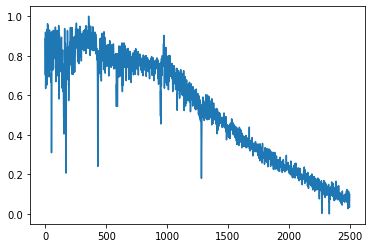

In [320]:
axis = range(2500)
ar = test_A[0][0:2500]
plt.plot(axis, ar)
plt.show()

In [321]:
 Out_B

array([[0.725635  , 0.77840364, 0.78050774, ..., 0.06899863, 0.12718746,
        0.15639398],
       [0.6478166 , 0.710267  , 0.7114425 , ..., 0.00397879, 0.17290035,
        0.20867327]], dtype=float32)

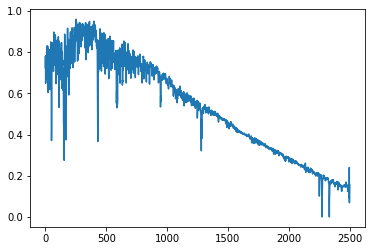

In [322]:
axis = range(2500)
ar = Out_B[0][0:2500]
plt.plot(axis, ar)
plt.show()

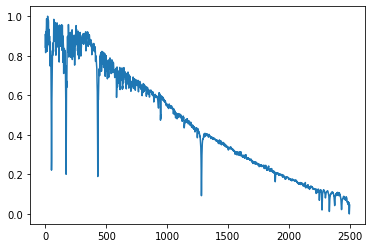

In [323]:
axis = range(2500)
ar = test_B[0][0:2500]
plt.plot(axis, ar)
plt.show()

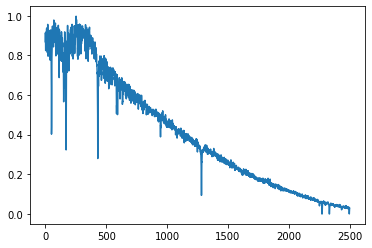

In [324]:

axis = range(2500)
ar = Out_A[0][0:2500]
plt.plot(axis, ar)
plt.show()

In [325]:
test_A.shape

(2, 2500)

In [326]:
Out_A[0][0:2500].shape

(2500,)

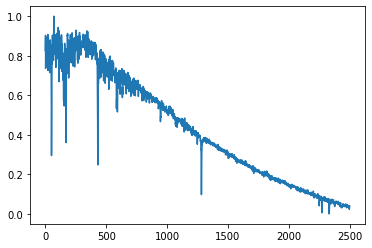

In [327]:
axis = range(2500)
ar = x_train[2][0:2500]
plt.plot(axis, ar)
plt.show()

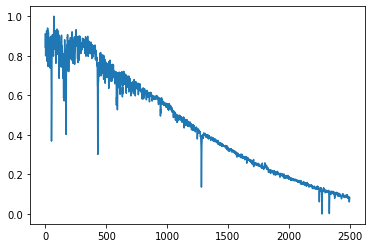

In [314]:
axis = range(2500)
ar = y_train[2][0:2500]
plt.plot(axis, ar)
plt.show()